# 2.7 - Models and machine learning

### Learning goals for today
1. Understand how to fit models to data, and use those models to make predictions
2. Use machine learning models to classify large datasets

---
### How to use this notebook during class
- Follow along as we go
- Use your **Cards** to indicate where you're at:
    - A **🟩Green card** means you are caught up with Max and **ready to help your classmates**
    - A **🟥Red card** means you are stuck and need help
- <span style='color:red;'>EXERCISE</span> — work on this problem by yourself, or try with a partner if you get stuck
---


First let's import some libraries we will use today. Remember if you don't have a library installed you can pip install it with:

%pip install *package_name*

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

## 1) Beak size inheritance - predictive models

The Grants also collected data about beak size of parents and offspring finches. We'll use this data to introduce the idea of building predictive models for data


In [11]:
heredity_df = pd.read_csv('grant_heredity.csv')
heredity_df

,species,offspring beak depth (mm),parent beak depth (mm)
0,fortis,10.7000,10.1000
1,fortis,9.7800,9.5500
2,fortis,9.4800,9.4000
3,fortis,9.6000,10.2500
4,fortis,10.2700,10.1250
...,...,...,...
538,scandens,9.4899,9.6516
539,scandens,9.5962,9.7572
540,scandens,9.6873,9.8854
541,scandens,9.5203,10.0023


<Axes: xlabel='parent beak depth (mm)', ylabel='offspring beak depth (mm)'>

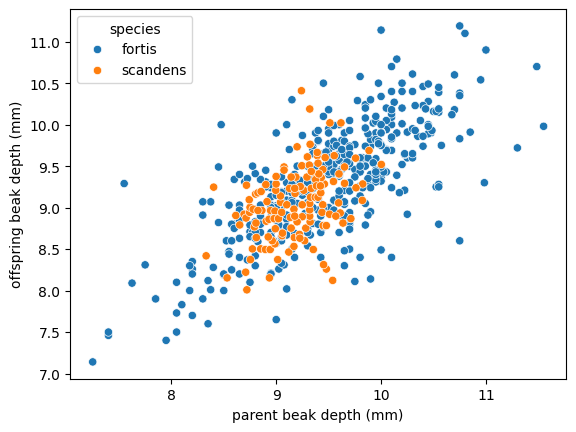

In [3]:
sns.scatterplot(data=heredity_df,
                x='parent beak depth (mm)',
                y='offspring beak depth (mm)',
                hue='species')

### <span style='color:red;'>EXERCISE 1</span>: Compute linear correlation coefficient  (5 min)

Let's **describe** the relationship between these two using the linear correlation coefficient. Use scipy.stats.pearsonr to compute the linear correlation coefficient between parent and offpsring beak depth, and print it

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

In [19]:
r,p = stats.pearsonr(heredity_df['parent beak depth (mm)'], 
                     heredity_df['offspring beak depth (mm)'], 
                     alternative='two-sided', 
                     method=None, 
                     axis=0)
print(r,p)

0.7097401211174013 2.36993237832448e-84


What if we want to **predict** one value given another - for that we need a **model**

Today we'll use the **scikit-learn** library, which has lots of machine learning tools

This looks like a linear relationship so we'll try a very simple linear model to predict offpsring beak depth

If you  need to install it, do so with ...

`%pip install scikit-learn`

In [24]:
%pip install scikit-learn
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Note: you may need to restart the kernel to use updated packages.


### Getting the data ready
we need a features matrix, (by convention we'll call it X), which is shape = (n_samples, n_features), for us n_features will be 1

and a values matrix (y), which will be length n_samples and is the thing we're trying to predict

In [30]:
X = heredity_df['parent beak depth (mm)'].values[:, np.newaxis]
y = heredity_df['offspring beak depth (mm)'].values[:, np.newaxis]
X.shape

(543, 1)

The goal here is to build a linear model that can use parent beak depth (X) to predict offpsring beak depth (y). The basic steps are:
1. Split the samples into training and testing data
2. Define a model
3. Fit the model (optimize)
4. Use the model to predict the testing data
5. Evaluate the performance (compare predictions vs. real test data) - Exercise

Let's first write **pseudo-code**, then we'll fill it in with real code. A benefit of this strategy is that you can plan the approach without knowing all the syntax yet, and look up what syntax you are missing

In [31]:
# Split X (features) and y into test (20%) and training data (80%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Fit a linear regression model to the training data (X)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# Predict y for the test data
y_predicted = regr.predict(X_test)

### <span style='color:red;'>EXERCISE 2</span>: Compute the fraction of explained variance  (10 min)

Use google or your favorite LLM (UAlbany has a Copilot license) to figure out how to compute the fraction of variance explained by our model in sklearn. Computing this will require using y_test and y_predicted

In [33]:
# Evaluate the performace: fraction of variance explained by the model
from sklearn.metrics import explained_variance_score

frac_var_explained = explained_variance_score(y_test, y_predicted)
print(frac_var_explained)

0.4630090395077483


In addition to quantifying overall performance, it's a good idea to examine the predictions compared to the true values, to see what your model is doing. We'll do that with two plots:
1. Predicted vs. test values
2. The difference between predicted and true values ("residuals") as a function of the predicted values

Text(0, 0.5, 'True')

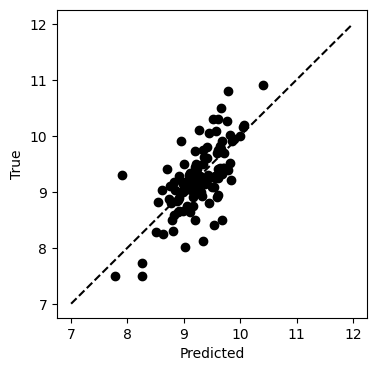

In [38]:
# Plot predictions vs real values for test data
fh, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot(y_predicted, y_test, 'ko')
ax.plot([7,12],[7,12],'k--')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

Text(0, 0.5, 'Residuals')

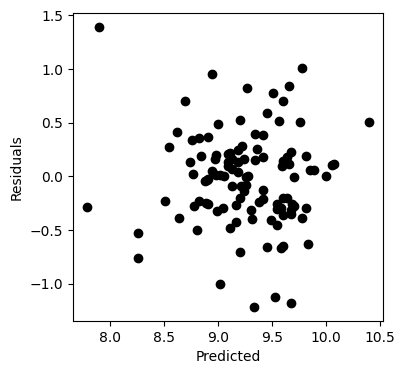

In [39]:
residuals = y_test - y_predicted

fh, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot(y_predicted, residuals, 'ko')
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')

There is no clear relationship between the predicted values and the residuals, which is good. It means our model isn't systematically wrong

### Adding another feature
We also have information about the species of the parent/offspring pair - let's see if we can provide this information to the model to see if it helps its predictions.

Conceptually, we want to use **two** features now to predict `offspring_beak_depth`:

1. `parent_beak_depth`
2. `species`

But (1) is a number, and (2) is a category. How do we train a model on a combination of numbers and categories? One strategy is called **one-hot encoding** where we have a new feature for each category, and each sample has a 1 for its category and 0s everywhere else

In [44]:
one_hot_species = pd.get_dummies(heredity_df['species']).astype('int')
one_hot_species

,fortis,scandens
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
538,0,1
539,0,1
540,0,1
541,0,1


In [45]:
heredity_df=pd.concat([heredity_df, one_hot_species], axis=1)
heredity_df

,species,offspring beak depth (mm),parent beak depth (mm),fortis,scandens
0,fortis,10.7000,10.1000,1,0
1,fortis,9.7800,9.5500,1,0
2,fortis,9.4800,9.4000,1,0
3,fortis,9.6000,10.2500,1,0
4,fortis,10.2700,10.1250,1,0
...,...,...,...,...,...
538,scandens,9.4899,9.6516,0,1
539,scandens,9.5962,9.7572,0,1
540,scandens,9.6873,9.8854,0,1
541,scandens,9.5203,10.0023,0,1


Training the model on this new feature set looks a lot like the code above

In [55]:
X = heredity_df[['parent beak depth (mm)', 'fortis', 'scandens']].values
y = heredity_df['offspring beak depth (mm)'].values
print(X.shape)
print(y.shape)

# Split X (features) and y into test (20%) and training data (80%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Fit a linear regression model to the training data (X)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# Predict y for the test data
y_predicted = regr.predict(X_test)

# Evaluate the performace: fraction of variance explained by the model
from sklearn.metrics import explained_variance_score

frac_var_explained = explained_variance_score(y_test, y_predicted)
print(frac_var_explained)

(543, 3)
(543,)
0.5041643622549401


## 2) Beak size dataset - machine learning classifier

Let's re-load our original beak size dataframe, and look at the distribution again


The beak size distributions are pretty non-overlapping, which suggests that we should be able to predict the species based on beak measurements alone. One way to do this is with a classifier model.

We are going to use a simple, commmon model called a **Support Vector Machine (SVM)**.

sklearn has an implementation of an SVM for classification called a **Support Vector Classifier (SVC)**

### Getting the data ready
we need a features matrix, (by convention we'll call it X), which is shape = (n_samples, n_features), for us n_features will be 2
and a values matrix (y), which will be length n_samples and just be the species name for each sample

The steps for doing this kind of classification are:
1. Split the data into training data and testing data
2. Fit the model
3. Predict some testing data and evaluate the model's performance

### Visualizing the decision boundary
SVM works by forming a decision boundary in the feature space that splits points into each class. In this case the feature space is just two dimensional, so it's easy to visualize. But in principle this can be a high dimensional feature space

What features is the model using to predict species? We have a sense that it's going to be the beak length, since that's the axis that separates the groups better. We can quantify this using a permutation test, and sklearn has a function that does this for us called **permutation_importance**

What this function is doing is, for each feature, scrambling the features relative to the labels and re-testing, to see how well the model does when one feature at a time is randomized. The permutation importance for a feature is related to how much model performance drops when you randomize that feature.

Remember the first feaure was beak length, and the second was beak depth

`X = beak_df[['beak length (mm)', 'beak depth (mm)']].values`


### <span style='color:red;'>EXERCISE 3</span>: Test how well the model does with fewer features  (15 min)

Modify the SVC code above to measure prediction accuracy using just one or the other feature
